Initial setup

Firstly: Install Pytorch - intialize and test to verify it works

Expected output(along these lines):
"""
tensor([[0.3380, 0.3845, 0.3217],
        [0.8337, 0.9050, 0.2650],
        [0.2979, 0.7141, 0.9069],
        [0.1449, 0.1132, 0.1375],
        [0.4675, 0.3947, 0.1426]]) 
"""

Output is fine, move on

In [2]:


# Test

import torch
x = torch.rand(5, 3)
print(x)


tensor([[0.1881, 0.3059, 0.7956],
        [0.9542, 0.8160, 0.7729],
        [0.8211, 0.4832, 0.5025],
        [0.6976, 0.4087, 0.6865],
        [0.8010, 0.3478, 0.3512]])


False

Download the MNIST dataset and set it up

- Pytorch already has the dataset available to download - external download not required(program can download for you)

1. Make the transform function to clean and convert the data to a usable format - raw cannot be used
    - ToTensor converts it into a usable image - i.e. pixels assigned, RGB values
    - Normalize data w/ a mean and standard deviation
2. Download the data, feed the transform function into to clean it = it becomes usable
    - Sort into two main groups:
        - Training
        - Validation
3. Load the data to prepare for use



In [12]:
import torch    
import torchvision

# Clean/converting data
transformer = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))]) 

# Download data
train = torchvision.datasets.MNIST(root = "./MNIST_data", download = True, train = True, transform = transformer)
values = torchvision.datasets.MNIST(root = "./MNIST_data", download = True, train = True, transform = transformer)

# Load the data
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(values, batch_size=64, shuffle=True)




Do some testing to make sure the dataset works

1. Analyze the dataset
    - Check data sample size(should be the same as batch_size when we loaded the data)
    - Check data itself(images should be 28x28 pixels)
2. Show a couple of the random data onto the screen - show images
    - Plot the numbers to show image using matplotlib library

torch.Size([64, 1, 28, 28])
torch.Size([64])


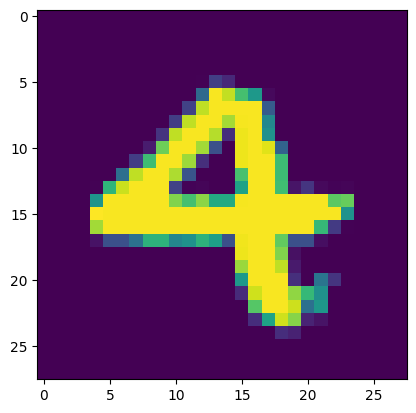

In [36]:
# 1
# Check data w/ a sample
trainingdata = iter(trainloader)
images, labels = next(trainingdata)
print(images.shape)
print(labels.shape)

# 2
# Plot an image on screen to see using matplotlib
import matplotlib.pyplot as plot
# numpy() converts the tensor object into a numpy array
# Squeeze just cleans up any one dimensional array parts
plot.imshow(images[0].numpy().squeeze())




Build the neural network from the data that's already cleaned and sorted
- Use torch.nn to build the neural network

Model generated sequentially - simpler
- Linear - applies a linear transformation to it
- ReLu - function which allows positive values to pass through, negative values set to zero
- Output layer - calculated w/ the LogSoftmax function
- cross-entropy loss layer(used to measure the performance of the netwok) - comes after the output; LogSoftmax function = NLLLoss function (compare the two)
    - Determine how different the test statistic is from the expected statistic
    - LogSoftmax dimension = 1 since technically image was flattened into one dimensional w/ 784 pixels per image

1. Declare all the sizes for the layers of the neural networks
    - Input
    - Output
    - 2 hidden layers

2. Generate the model - had to use template for layer size since unfamiliar with the model and tensorflow infrastructure

3. Calculate NLLLoss for the end in order to calculate the validity of the final product/prediction

In [35]:
import torch.nn as nn 

# Input size = all the pixels (28*28)
input_size = 784

# Output size = 10 (10 numbers since 0 to 9)
output_size = 10

# Hidden sizes, used examples from online
hidden_size = [128, 64]

# Assemble the network
model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.LogSoftmax(dim=1))


# Should have 64 labels present for 64 images
images, labels = next(iter(trainloader))
# images.shape[0] should be 64 - sample size was 64
images = images.view(images.shape[0], -1)


Make the neural network learn(- adjust weights as it learns to minimize loss)
- Use torch.optim to optimize the training and make it more efficient
- Using Stochastic gradient descent(SGD) - essentially estimating the gradient as it uses a stochastic(random) approach instead of fully calculating it
- Weights will be updated by back-propagation method\

1. Use torch.optim to start the process - declare an optimizer
2. Start the training - repeat for the epochs necessary

In [58]:
import time

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.09)
# Current time/starting
time0 = time.time()
# Desired repetitions for training
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long array
        images = images.view(images.shape[0], -1)
    
        # Training pass - resets the gradients for the next pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = losscriteria(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # Model adapts/optimizes the weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e} - Training loss: {running_loss/len(trainloader)}")

print(f"\nTraining Time = {(time.time()-time0)/60} minutes")

Epoch 0 - Training loss: 0.05471720678586838
Epoch 1 - Training loss: 0.05252310716540122
Epoch 2 - Training loss: 0.05065052366248572
Epoch 3 - Training loss: 0.0487788473802017
Epoch 4 - Training loss: 0.047056440297248106
Epoch 5 - Training loss: 0.04530343713947752
Epoch 6 - Training loss: 0.0431948358856781
Epoch 7 - Training loss: 0.041737555936008676
Epoch 8 - Training loss: 0.04052201826879973
Epoch 9 - Training loss: 0.038787448295711804
Epoch 10 - Training loss: 0.037646493014406916
Epoch 11 - Training loss: 0.0360848678195023
Epoch 12 - Training loss: 0.03522748640613821
Epoch 13 - Training loss: 0.03353309145481236
Epoch 14 - Training loss: 0.03273819119948496

Training Time = 5.484980499744415 minutes


Validate our model

1. Load images and labels from the valloader
2. Load the test image(image at index zero)
3. Feed test image into model
4. Print out the output and also the image it's detecting from

Predicted Digit = 4


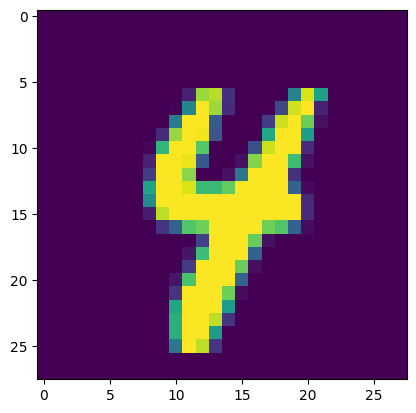

In [59]:
images, labels = next(iter(valloader))
# Get a test image, turn it into the desired format that we converted the images to to train the network
testimage = images[0].view(1, 784)

logprob = model(testimage)
ps = torch.exp(logprob)
probab = list(ps.detach().numpy()[0])
output = probab.index(max(probab))
print("Predicted Digit =", output)
plot.imshow(images[0].numpy().squeeze())